In [1]:
import pyibisami.amimodel as ami
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
myModel = ami.AMIModel('sv_ami_ctle_dfe_6_25_ghz_tyco.dll')

In [5]:
initData = ami.AMIModelInitializer({'root_name' : 'myDLL'})

In [6]:
len_imp_response = 1024
channel_response = np.zeros((len_imp_response))
channel_response[1]=1
initData.channel_response = channel_response
initData.row_size = len_imp_response
initData.bit_time = 1/6.25e9
initData.sample_interval = 12.5e-12

In [7]:
myModel.initialize(initData)

In [8]:
h1 = myModel.initOut

In [9]:
wfm_out = myModel.getWave(h1)

In [10]:
T = myModel.sample_interval
t = [i * T for i in range(len(h1))]

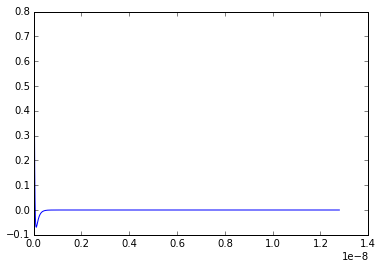

In [11]:
plt.plot(t, wfm_out)

In [12]:
H = np.fft.fft(wfm_out)

In [13]:
freqs = [i * (1/myModel.sample_interval) / len(t) for i in range(len(t) / 2)]

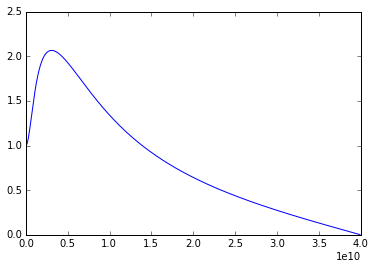

In [14]:
plt.plot(freqs, abs(H[:len(H)/2]))

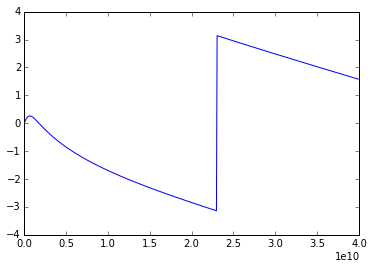

In [15]:
plt.plot(freqs, np.angle(H[:len(H)/2]))

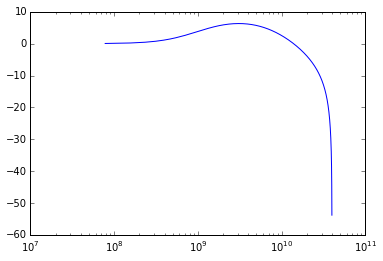

In [16]:
plt.semilogx(freqs, 20*np.log10(abs(H[:len(H)/2])))

In [17]:
myModel.ami_params_in

'(myDLL (VCSEL_Driver_RiseFallTime 10e-12))'